Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

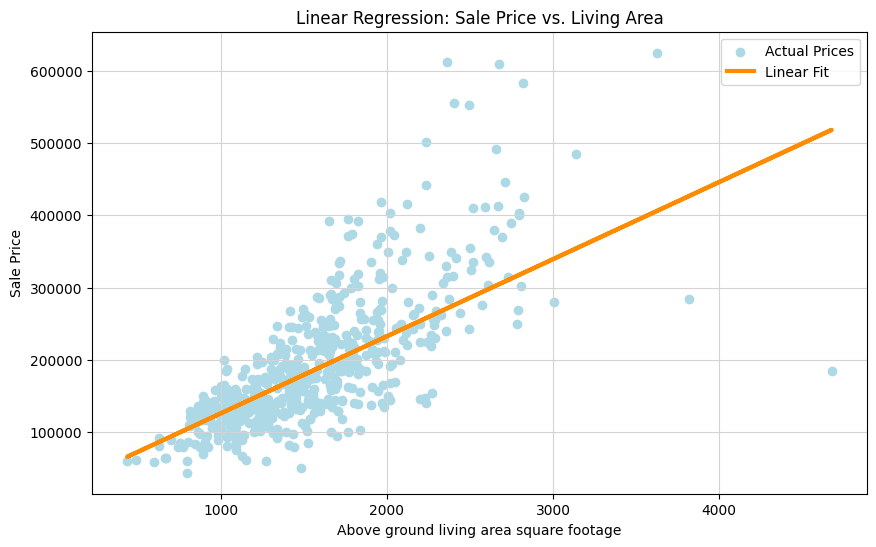

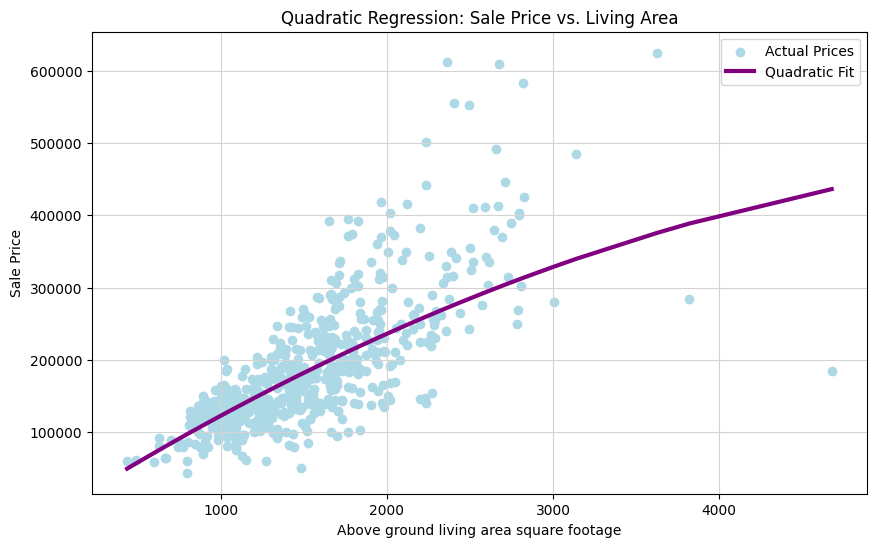

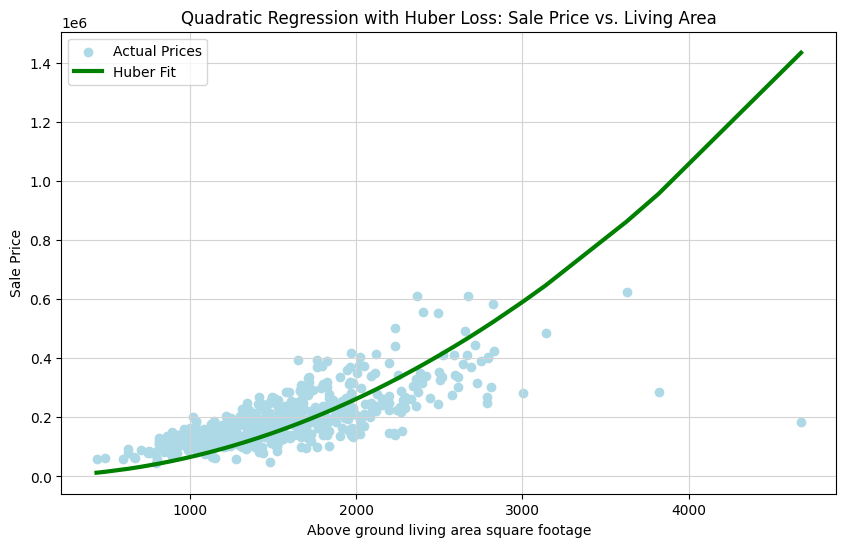

Linear Model - Mean Squared Error: 3821184066.2726417, R-squared: 0.5233974153691151
Quadratic Model - Mean Squared Error: 3750566954.617642, R-squared: 0.5322052344509032
Huber Model - Mean Squared Error: 8726080108.635662, R-squared: -0.08837267751110045


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from pathlib import Path

# Load the dataset
url = 'https://jse.amstat.org/v19n3/decock/AmesHousing.txt'
data = pd.read_csv(url, delimiter='\t')

# Print column names to verify the correct names
print(data.columns)

# Select the target variable and an explanatory variable
X = data[['Gr Liv Area']]  # Explanatory variable
y = data['SalePrice']    # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Perform quadratic regression
poly = PolynomialFeatures(degree=2)
X_train_quad = poly.fit_transform(X_train)
X_test_quad = poly.transform(X_test)

quad_model = LinearRegression()
quad_model.fit(X_train_quad, y_train)
y_pred_quad = quad_model.predict(X_test_quad)

# Perform quadratic regression with Huber Regressor (using Huber loss)
huber_model = HuberRegressor()
huber_model.fit(X_train_quad, y_train)
y_pred_huber = huber_model.predict(X_test_quad)

# Calculate performance metrics for linear regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Calculate performance metrics for quadratic regression
mse_quad = mean_squared_error(y_test, y_pred_quad)
r2_quad = r2_score(y_test, y_pred_quad)

# Calculate performance metrics for Huber regression (using Huber loss)
mse_huber = mean_squared_error(y_test, y_pred_huber)
r2_huber = r2_score(y_test, y_pred_huber)

# Plot linear regression results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='#ADD8E6', label='Actual Prices')
plt.plot(X_test, y_pred_linear, color='#FF8C00', linewidth=3, label='Linear Fit')
plt.xlabel('Above ground living area square footage')
plt.ylabel('Sale Price')
plt.title('Linear Regression: Sale Price vs. Living Area')
plt.legend()
plt.grid(True, color='#D3D3D3')

# Save linear regression plot
output_dir = Path('figures/1_6')
output_dir.mkdir(parents=True, exist_ok=True)
linear_plot_path = output_dir / 'ames_iowa_housing_linear.png'
plt.savefig(linear_plot_path, bbox_inches='tight', pad_inches=0)
plt.show()

# Plot quadratic regression results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='#ADD8E6', label='Actual Prices')
sorted_indices = X_test['Gr Liv Area'].argsort().values
plt.plot(X_test.iloc[sorted_indices], y_pred_quad[sorted_indices], color='#800080', linewidth=3, label='Quadratic Fit')
plt.xlabel('Above ground living area square footage')
plt.ylabel('Sale Price')
plt.title('Quadratic Regression: Sale Price vs. Living Area')
plt.legend()
plt.grid(True, color='#D3D3D3')

# Save quadratic regression plot
quad_plot_path = output_dir / 'ames_iowa_housing_quadratic.png'
plt.savefig(quad_plot_path, bbox_inches='tight', pad_inches=0)
plt.show()

# Plot quadratic regression with Huber loss (Huber Regressor) results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='#ADD8E6', label='Actual Prices')
plt.plot(X_test.iloc[sorted_indices], y_pred_huber[sorted_indices], color='#008000', linewidth=3, label='Huber Fit')
plt.xlabel('Above ground living area square footage')
plt.ylabel('Sale Price')
plt.title('Quadratic Regression with Huber Loss: Sale Price vs. Living Area')
plt.legend()
plt.grid(True, color='#D3D3D3')

# Save Huber regression plot
huber_plot_path = output_dir / 'ames_iowa_housing_huber.png'
plt.savefig(huber_plot_path, bbox_inches='tight', pad_inches=0)
plt.show()

# Print performance metrics
print(f'Linear Model - Mean Squared Error: {mse_linear}, R-squared: {r2_linear}')
print(f'Quadratic Model - Mean Squared Error: {mse_quad}, R-squared: {r2_quad}')
print(f'Huber Model - Mean Squared Error: {mse_huber}, R-squared: {r2_huber}')

Linear Model Coefficients: [111.56740522]
Quadratic Model Coefficients: [ 0.00000000e+00  1.13676297e+02 -6.24002412e-04]
Huber Model Coefficients: [ 1.75408941e-01  1.33856339e+02 -9.60437686e-03]


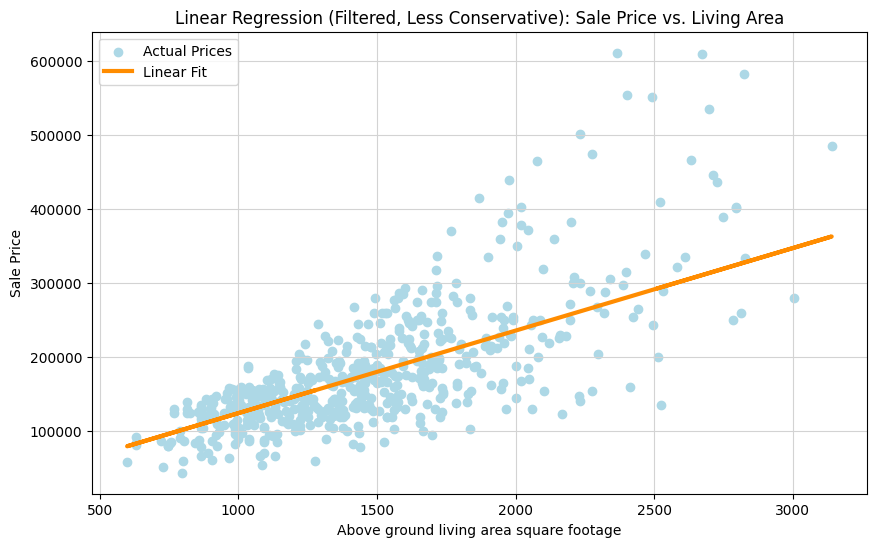

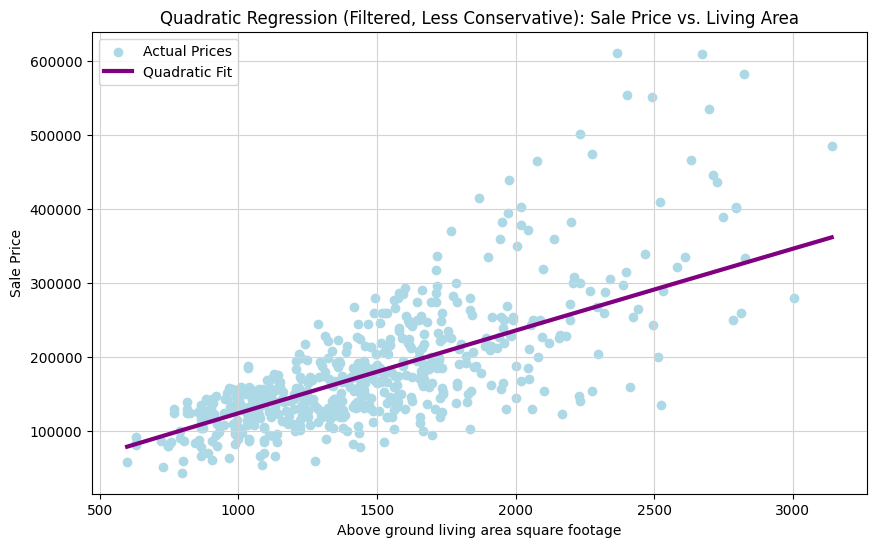

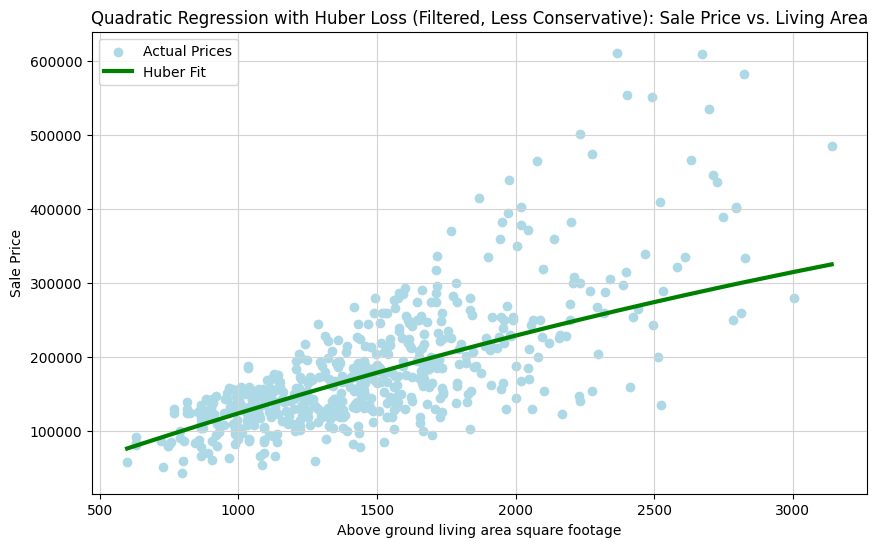

Linear Model (Filtered) - Mean Squared Error: 3389803195.337458, R-squared: 0.5224256850718756
Quadratic Model (Filtered) - Mean Squared Error: 3392381154.573187, R-squared: 0.5220624878462641
Huber Model (Filtered) - Mean Squared Error: 3593967280.9890103, R-squared: 0.4936619139266719


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from pathlib import Path

# Load the dataset
url = 'https://jse.amstat.org/v19n3/decock/AmesHousing.txt'
data = pd.read_csv(url, delimiter='\t')

# Remove outliers based on the 'Gr Liv Area' variable only with a less conservative approach
Q1 = data['Gr Liv Area'].quantile(0.25)
Q3 = data['Gr Liv Area'].quantile(0.75)
IQR = Q3 - Q1
multiplier = 3.0  # Increased multiplier to be less conservative
filter = (data['Gr Liv Area'] >= (Q1 - multiplier * IQR)) & (data['Gr Liv Area'] <= (Q3 + multiplier * IQR))
data_filtered = data.loc[filter]

# Select the target variable and an explanatory variable from filtered data
X_filtered = data_filtered[['Gr Liv Area']]
y_filtered = data_filtered['SalePrice']

# Split the filtered data into training and testing sets
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Perform linear regression on filtered data
linear_model_f = LinearRegression()
linear_model_f.fit(X_train_f, y_train_f)
y_pred_linear_f = linear_model_f.predict(X_test_f)

# Perform quadratic regression on filtered data
poly = PolynomialFeatures(degree=2)
X_train_quad_f = poly.fit_transform(X_train_f)
X_test_quad_f = poly.transform(X_test_f)

quad_model_f = LinearRegression()
quad_model_f.fit(X_train_quad_f, y_train_f)
y_pred_quad_f = quad_model_f.predict(X_test_quad_f)

# Perform quadratic regression with Huber Regressor (using Huber loss) on filtered data
huber_model_f = HuberRegressor()
huber_model_f.fit(X_train_quad_f, y_train_f)
y_pred_huber_f = huber_model_f.predict(X_test_quad_f)

# Calculate performance metrics for linear regression on filtered data
mse_linear_f = mean_squared_error(y_test_f, y_pred_linear_f)
r2_linear_f = r2_score(y_test_f, y_pred_linear_f)

# Calculate performance metrics for quadratic regression on filtered data
mse_quad_f = mean_squared_error(y_test_f, y_pred_quad_f)
r2_quad_f = r2_score(y_test_f, y_pred_quad_f)

# Calculate performance metrics for Huber regression (using Huber loss) on filtered data
mse_huber_f = mean_squared_error(y_test_f, y_pred_huber_f)
r2_huber_f = r2_score(y_test_f, y_pred_huber_f)

# Print model coefficients
print("Linear Model Coefficients:", linear_model_f.coef_)
print("Quadratic Model Coefficients:", quad_model_f.coef_)
print("Huber Model Coefficients:", huber_model_f.coef_)

# Plot linear regression results on filtered data
plt.figure(figsize=(10, 6))
plt.scatter(X_test_f, y_test_f, color='#ADD8E6', label='Actual Prices')
plt.plot(X_test_f, y_pred_linear_f, color='#FF8C00', linewidth=3, label='Linear Fit')
plt.xlabel('Above ground living area square footage')
plt.ylabel('Sale Price')
plt.title('Linear Regression (Filtered, Less Conservative): Sale Price vs. Living Area')
plt.legend()
plt.grid(True, color='#D3D3D3')

# Save linear regression plot on filtered data
output_dir = Path('figures/1_6')
output_dir.mkdir(parents=True, exist_ok=True)
linear_plot_path_f = output_dir / 'ames_iowa_housing_linear_filtered.png'
plt.savefig(linear_plot_path_f, bbox_inches='tight', pad_inches=0)
plt.show()

# Plot quadratic regression results on filtered data
plt.figure(figsize=(10, 6))
plt.scatter(X_test_f, y_test_f, color='#ADD8E6', label='Actual Prices')
sorted_indices_f = X_test_f['Gr Liv Area'].argsort().values
plt.plot(X_test_f.iloc[sorted_indices_f], y_pred_quad_f[sorted_indices_f], color='#800080', linewidth=3, label='Quadratic Fit')
plt.xlabel('Above ground living area square footage')
plt.ylabel('Sale Price')
plt.title('Quadratic Regression (Filtered, Less Conservative): Sale Price vs. Living Area')
plt.legend()
plt.grid(True, color='#D3D3D3')

# Save quadratic regression plot on filtered data
quad_plot_path_f = output_dir / 'ames_iowa_housing_quadratic_filtered.png'
plt.savefig(quad_plot_path_f, bbox_inches='tight', pad_inches=0)
plt.show()

# Plot quadratic regression with Huber loss (Huber Regressor) results on filtered data
plt.figure(figsize=(10, 6))
plt.scatter(X_test_f, y_test_f, color='#ADD8E6', label='Actual Prices')
plt.plot(X_test_f.iloc[sorted_indices_f], y_pred_huber_f[sorted_indices_f], color='#008000', linewidth=3, label='Huber Fit')
plt.xlabel('Above ground living area square footage')
plt.ylabel('Sale Price')
plt.title('Quadratic Regression with Huber Loss (Filtered, Less Conservative): Sale Price vs. Living Area')
plt.legend()
plt.grid(True, color='#D3D3D3')

# Save Huber regression plot on filtered data
huber_plot_path_f = output_dir / 'ames_iowa_housing_huber_filtered.png'
plt.savefig(huber_plot_path_f, bbox_inches='tight', pad_inches=0)
plt.show()

# Print performance metrics
print(f'Linear Model (Filtered) - Mean Squared Error: {mse_linear_f}, R-squared: {r2_linear_f}')
print(f'Quadratic Model (Filtered) - Mean Squared Error: {mse_quad_f}, R-squared: {r2_quad_f}')
print(f'Huber Model (Filtered) - Mean Squared Error: {mse_huber_f}, R-squared: {r2_huber_f}')